In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from functions import nth_derivative, partial
from torch.autograd.functional import jacobian
from torch.autograd.functional import hessian
import mplcyberpunk

In [2]:
plt.style.use('cyberpunk')
#mplcyberpunk.make_lines_glow()

In [4]:
def F(X):
    return X[0]**2 + X[0]*X[1]

In [5]:
X=torch.tensor([2.0,3.0], requires_grad=True)

In [6]:
torch.autograd.grad(F(X), X)[0]

tensor([7., 2.])

$$\frac{dx}{dt} = \sin(t)$$

$$x(0) = 0$$

And the input of the network are now: $t,x_0$

And the output is $ANN$

The reparametrization fos this initial value problem is:

$$\hat{x}(t,x_0) = x_0 + (1-e^{-(t-t_0)})ANN(t,x_0)$$

In [11]:
# x0_i=0.0

# x0_f=5.0

lna_i=0.1
lna_f=5.0

#### Differential equation

#1 Define the fucntion that describes the differential equation F(t;x,x',...)=0

#In this case, the solutions depends on many variables, then the derivative is actually a partial derivative:
# We're going to use 
def oscilador(net,T):
    return partial(net, T, (0,)) - torch.sin(T[:,0])

#### Architecture 

In [12]:
nodos=40
ANN = nn.Sequential(nn.Linear(1, nodos), nn.Tanh(), nn.Linear(nodos,nodos),
                    # nn.Tanh(), nn.Linear(nodos,nodos),
                    # nn.Tanh(), nn.Linear(nodos,nodos),
                    # nn.Tanh(), nn.Linear(nodos,nodos),
                    # nn.Tanh(), nn.Linear(nodos,nodos),
                    nn.Tanh(),nn.Linear(nodos,1))
print(ANN)

Sequential(
  (0): Linear(in_features=1, out_features=40, bias=True)
  (1): Tanh()
  (2): Linear(in_features=40, out_features=40, bias=True)
  (3): Tanh()
  (4): Linear(in_features=40, out_features=1, bias=True)
)


*** Esta función nos entrega el gradiente de la función que recibe:
$$F(x_1,x_2) \longrightarrow \nabla F(x_1,x_2)$$

In [13]:
# def nth_derivative(net, x):
#     output = net(x)

#     #grad_tensor = torch.ones(output.size(), dtype=torch.float32, requires_grad=True)
#     #gradients=torch.autograd.grad(output, x, grad_outputs=grad_tensor)[0]
#     gradients=torch.autograd.grad(output, x)[0]
#     # Calcular las derivadas parciales
#     #gradients = torch.autograd.grad(output, x)[0]
#     return gradients

In [14]:
def nth_derivative(net, x, n):
    # Initialize the gradient tensor to 1.0, as the 0th derivative is the function itself.
    ann=net(x)
    grad_tensor = torch.ones(ann.size(), dtype=torch.float32, requires_grad=True)
    for _ in range(n):
        # Compute the gradient of the network's output with respect to the input.
        ann = torch.autograd.grad(ann, x, grad_outputs=grad_tensor, create_graph=True)[0]
    return ann

In [19]:
#5 el intervalo que queremos para x
#x0 = torch.linspace(0,2,5)
T = torch.linspace(lna_i,lna_f,30)
# T = torch.cartesian_prod(t,x0)
T.requires_grad=True

In [23]:
T=T.reshape([30,1])

In [24]:
nth_derivative(ANN,T,1)

tensor([[-0.0030],
        [-0.0006],
        [ 0.0034],
        [ 0.0057],
        [ 0.0037],
        [-0.0036],
        [-0.0148],
        [-0.0275],
        [-0.0390],
        [-0.0475],
        [-0.0524],
        [-0.0536],
        [-0.0516],
        [-0.0474],
        [-0.0418],
        [-0.0355],
        [-0.0292],
        [-0.0232],
        [-0.0178],
        [-0.0131],
        [-0.0091],
        [-0.0059],
        [-0.0032],
        [-0.0012],
        [ 0.0004],
        [ 0.0015],
        [ 0.0023],
        [ 0.0029],
        [ 0.0032],
        [ 0.0033]], grad_fn=<MmBackward0>)

#### Reparametrization

In [25]:
def Param(T,net=ANN):
    out = net(T)
    b=1-torch.exp(ti-T[:,0])
    
    #return torch.reshape(T[:,1],out.size()) + b*out
    return torch.reshape(T[:,1],out.shape) + b.reshape(out.shape)*out

In [26]:
Param(T)

IndexError: index 1 is out of bounds for dimension 1 with size 1

#### Cost function


In [81]:
#Now the cost function
def cost(t):
    t.requires_grad=True
    Dt = nth_derivative(Param, t,1)[:,0] #Las derivadas parciales
    osc = Dt-torch.sin(T[:,0])
    return torch.linalg.norm(osc)

*** $\texttt{cost}$ debería poder ser evaluada en un conjunto con la forma de $\textbf{T}$ ***

### Nuestras funciones deberían estar vectorizadas

In [82]:
cost(T)

tensor(8.5304, grad_fn=<LinalgVectorNormBackward0>)

In [97]:
#4 Error and optimizer
learning_rate=0.01
epocas=100

#optimizer=torch.optim.SGD(ANN.parameters(),lr=learning_rate,momentum=0.9)
optimizer=optimizer = torch.optim.Adam(ANN.parameters(), lr=learning_rate)
#optimizer = torch.optim.Adadelta(ANN.parameters(), lr=learning_rate)

época=0.00 , loss=4.37
época=1.00 , loss=4.25
época=2.00 , loss=3.79
época=3.00 , loss=3.89
época=4.00 , loss=3.75
época=5.00 , loss=3.34
época=6.00 , loss=3.32
época=7.00 , loss=3.45
época=8.00 , loss=3.37
época=9.00 , loss=3.17
época=10.00 , loss=3.11
época=11.00 , loss=3.19
época=12.00 , loss=3.22
época=13.00 , loss=3.12
época=14.00 , loss=3.01
época=15.00 , loss=3.00
época=16.00 , loss=3.05
época=17.00 , loss=3.07
época=18.00 , loss=3.00
época=19.00 , loss=2.93
época=20.00 , loss=2.91
época=21.00 , loss=2.93
época=22.00 , loss=2.93
época=23.00 , loss=2.88
época=24.00 , loss=2.84
época=25.00 , loss=2.84
época=26.00 , loss=2.84
época=27.00 , loss=2.81
época=28.00 , loss=2.78
época=29.00 , loss=2.76
época=30.00 , loss=2.76
época=31.00 , loss=2.75
época=32.00 , loss=2.72
época=33.00 , loss=2.70
época=34.00 , loss=2.70
época=35.00 , loss=2.69
época=36.00 , loss=2.66
época=37.00 , loss=2.64
época=38.00 , loss=2.63
época=39.00 , loss=2.62
época=40.00 , loss=2.60
época=41.00 , loss=2.59
ép

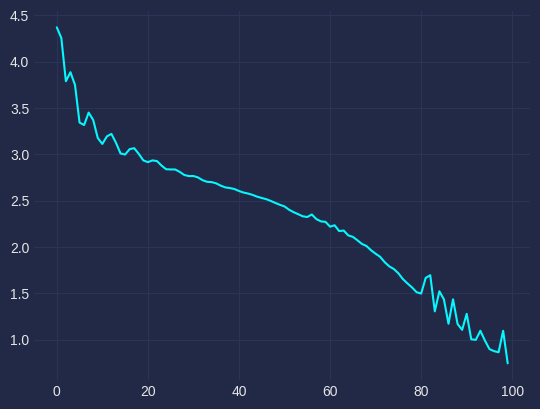

In [98]:
#loop de entrenamiendo 
errores=[]
for i in range(epocas):
    l=cost(T) #coste
    l.backward() #gradiente
    optimizer.step() #se actualizan los parámetros
    optimizer.zero_grad() #vacíamos el gradiente
    #print('época=%.2f , loss=%.2f'%(i,l))
    errores.append(float(l))
    print('época=%.2f , loss=%.2f'%(i,l))
plt.plot(range(epocas),errores)

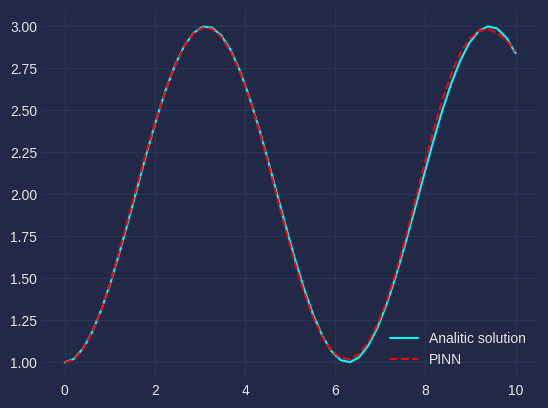

In [119]:
x = torch.linspace(0,10,50)
x=x.reshape(50,1)

u = torch.linspace(0,10,50)
v = torch.ones(u.size())
X = torch.cartesian_prod(u,v)

#plt.plot(x,x**2,'ro')
plt.plot(x,2-torch.cos(x),label='Analitic solution')
plt.plot(X[:,0],Param(X,net=ANN).detach().numpy(),'--r', label='PINN')
plt.legend()
#mplcyberpunk.make_lines_glow()

In [115]:
X.size()

torch.Size([2500, 2])

In [106]:
Param(X,net=ANN).shape

torch.Size([25, 1])

In [46]:
T[0]

tensor([0., 0.], grad_fn=<SelectBackward0>)

In [21]:
def G(X): # Desempaqueta el tensor X en sus componentes x e y
    resultado = X[0]**2 + X[1]**3
    return resultado

# Ejemplo de uso
# Genera un tensor de entrada X en R^2
X = torch.tensor([1.0, 2.0], requires_grad=True)

G(X)

tensor(9., grad_fn=<AddBackward0>)

In [22]:
G(T)

tensor([0.0000, 0.1250], grad_fn=<AddBackward0>)

In [23]:
G(T)

tensor([0.0000, 0.1250], grad_fn=<AddBackward0>)

In [114]:
partial(G,X,(1,1))

tensor(12.)

In [104]:
def f(x):
    y = torch.sin(x)
    return y

x = torch.tensor([0.0, 1.0, 2.0], requires_grad=True)
J = torch.autograd.functional.jacobian(f, x)

In [105]:
partial(f,x,(1,))

tensor([0.0000, 0.5403, -0.0000])

In [100]:
a=len((1,))

In [101]:
if a>1: print('holo')
else: print('hi')

hi
